In [190]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import matplotlib.pyplot as plt

In [4]:
tabTot =  ascii.read('/home/mj1e16/keplerPhotometry/sexdiffOutNew.csv')
matchTab = ascii.read('/home/mj1e16/outTables/foundObjects_0_686.csv')

In [127]:
tabMini = tabTot[0:686]

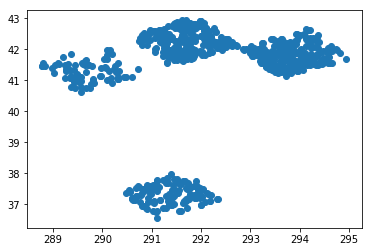

In [198]:
ratab = tabMini['RA']
dectab = tabMini['DEC']
# ratab.tolist()
# dectab.tolist()

# rasort = sorted(ratab)
# decsort = [x for _,x in sorted(zip(rasort,dectab))]
plt.plot(ratab,dectab,'o')
plt.show()

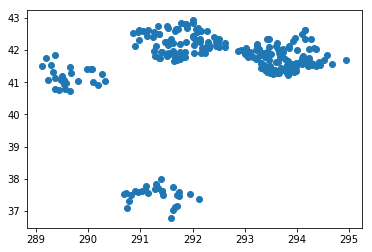

In [197]:
ramatch = matchTab['RA']
decmatch = matchTab['DEC']
ramatch.tolist()
decmatch.tolist()


coordsdeg = [SkyCoord(str(x),str(y), unit=(u.hourangle, u.deg)) for x,y in zip(ramatch,decmatch)]
raindeg = [c.ra.deg for c in coordsdeg]
decindeg = [c.dec.deg for c in coordsdeg]
plt.plot(raindeg,decindeg,'o')
plt.show()

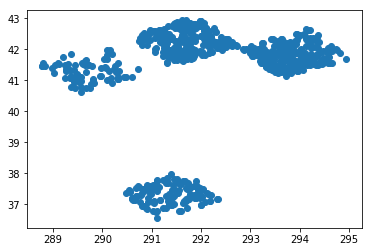

In [202]:
table = tabMini['RA']
table = tabMini['DEC']
# ratab.tolist()
# dectab.tolist()

# rasort = sorted(ratab)
# decsort = [x for _,x in sorted(zip(rasort,dectab))]
plt.plot(ratab,dectab,'o')
plt.show()

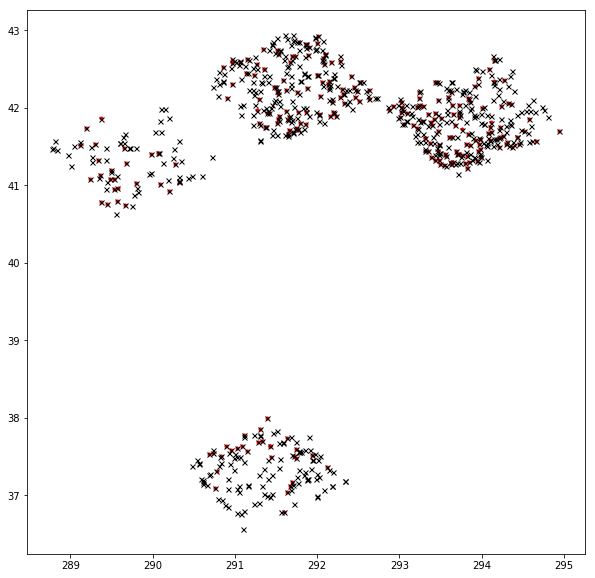

In [222]:
plt.figure(figsize=(10,10))
plt.plot(raindeg,decindeg,'ro',markersize=3)
plt.plot(ratab,dectab,'kx',markersize=5)
plt.show()

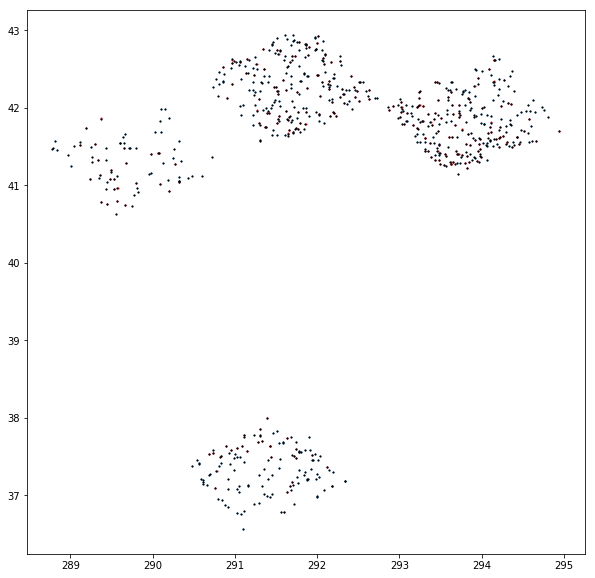

In [212]:
plt.figure(figsize=(10,10))
plt.plot(ratab,dectab,'o',markersize=1)
plt.plot(raindeg,decindeg,'ro',markersize=1.)
plt.plot(ratab,dectab,'ko',markersize=1.)
plt.show()

In [105]:
coords = [(x,y) for x,y in zip(rasort,decsort)]
coordsm = [(x,y) for x,y in zip(rasortm,decsortm)]

In [108]:
coordsdeg = [SkyCoord(x[0]*u.deg,x[1]*u.deg) for x in coords]

In [113]:
#coordsdeg[0].to_string('hmsdms')
coordshour = [c.to_string('hmsdms') for x in coordsdeg]

In [224]:
ra1 = matchTab['RA']
dec1 = matchTab['DEC']
c = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
catalog = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
print(idx)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  91  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 155 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 201 201 204 205 206 207 208 209 210 211 212 213 215 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [215]:
def testfindMatches(tabTot,matchTab,arcsec=3600.):

    matches = 'not matched'
    ra1 = matchTab['RA']
    dec1 = matchTab['DEC']
    idx = []
    ra2 = tabMini['RA']
    dec2 = tabMini['DEC']    
    c = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
    catalog = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog)
    matches = [x for x in d3d if x < arcsec]
    #idxnew = [x-1 for x in idx]
#     print(len(matches))
#     print(matches)
#     print(idx)
#     print(len(idx))
    tabMini.remove_rows(idx)
    return tabMini

In [216]:
tabMini = tabTot[0:686]

In [217]:
table = testfindMatches(tabMini,matchTab)

In [178]:
table

array([  1,   2,   3,   7,  10,  12,  17,  18,  20,  21,  22,  26,  27,
        31,  33,  36,  37,  39,  42,  43,  44,  45,  51,  52,  66,  70,
        80,  82,  84,  85,  87,  88,  89,  91,  92,  94,  95,  99, 102,
       104, 106, 107, 115, 116, 117, 118, 119, 124, 126, 127, 128, 130,
       131, 135, 137, 141, 143, 144, 145, 147, 148, 151, 153, 154, 156,
       160, 165, 172, 173, 175, 176, 181, 183, 185, 188, 189, 192, 198,
       199, 200, 201, 204, 208, 215, 221, 222, 232, 233, 238, 239, 240,
       241, 241, 244, 246, 250, 253, 255, 259, 262, 263, 265, 270, 275,
       285, 286, 289, 295, 299, 302, 305, 308, 309, 313, 318, 323, 325,
       328, 330, 331, 334, 337, 342, 345, 346, 347, 348, 349, 350, 353,
       354, 355, 363, 369, 373, 374, 375, 377, 379, 383, 384, 385, 390,
       393, 394, 395, 396, 399, 402, 403, 414, 416, 421, 423, 424, 426,
       426, 428, 433, 437, 439, 442, 443, 450, 451, 453, 454, 456, 461,
       464, 470, 471, 472, 478, 483, 484, 485, 486, 487, 488, 48

In [189]:
for x in table:
    coords = SkyCoord(tabMini[x]['RA']*u.deg,tabMini[x]['DEC']*u.deg)
    print(coords.to_string('hmsdms'))

19h17m29.7934s +41d51m30.3115s
19h16m46.8689s +41d44m16.6705s
19h20m46.8475s +40d55m09.5767s
19h21m16.4929s +41d02m20.1774s
19h18m38.4653s +40d44m24.5443s
19h20m22.908s +41d00m42.8261s
19h18m16.1368s +40d47m59.7494s
19h17m47.7362s +40d45m15.0484s
19h17m29.7619s +40d47m03.6588s
19h19m12.4188s +41d01m55.196s
19h21m06.5624s +41d16m12.3411s
19h18m17.3369s +40d58m03.098s
19h18m08.0801s +40d57m05.6783s
19h18m08.434s +41d04m22.8577s
19h17m56.155s +41d04m23.2134s
19h20m19.9456s +41d24m33.3538s
19h20m15.5543s +41d24m55.5107s
19h19m55.2024s +41d23m48.248s
19h18m42.6866s +41d16m49.7581s
19h17m58.3008s +41d11m24.2192s
19h17m26.7069s +41d07m32.9097s
19h16m56.6164s +41d05m03.5828s
19h17m20.9702s +41d19m08.7062s
19h18m37.8339s +41d28m56.635s
19h17m12.1446s +41d31m35.475s
19h16m28.9498s +41d31m10.5835s
19h23m52.2823s +42d37m11.9299s
19h23m24.4025s +42d31m43.4192s
19h28m48.3178s +41d55m25.2559s
19h26m48.6064s +41d41m25.013s
19h26m34.7576s +41d39m55.0736s
19h27m03.0273s +41d43m29.1456s
19h30m02.1901s +4

19h25m42.1577s +37d37m50.2892s


In [137]:
pantab = table.to_pandas()
pantab.sort_values('X_IMAGE')

,NUMBER,MAG_BEST,FLUX_MAX,X_IMAGE,Y_IMAGE,ELONGATION,ELLIPTICITY,RA,DEC
303,761,17.7611,641.56880,14.0006,307.9573,1.019,0.019,294.758637,41.973231
228,229,18.8876,280.31510,14.1620,829.0105,1.030,0.029,294.366086,42.470016
297,726,17.9474,639.72320,16.9518,342.1617,1.252,0.202,294.729280,42.004248
144,700,19.5756,133.04070,26.9871,328.0378,1.025,0.024,290.796802,42.153823
315,865,18.7537,291.73430,27.0613,217.9215,1.172,0.147,294.809059,41.879987
205,54,18.6391,97.72133,34.2191,1003.7695,1.199,0.166,294.207183,42.625087
385,234,17.2123,942.58660,34.2836,681.7418,1.140,0.123,290.616686,37.141542
62,107,18.7669,115.29310,34.5310,958.9123,1.088,0.081,291.310883,41.571351
383,221,18.1380,389.72830,43.8758,704.2037,1.264,0.209,290.610921,37.168125
350,44,17.8808,160.43810,45.7902,50.5880,1.125,0.111,291.101848,36.562257


In [90]:
def findMatches(tabTot,matchTab,arcsec=5./3600.):

    matches = 'not matched'
    ra1 = matchTab['RA']
    dec1 = matchTab['DEC']
    idx = []
    while len(matches) != 0:
        ra2 = tabMini['RA']
        dec2 = tabMini['DEC']    
        c = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
        catalog = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
        idx, d2d, d3d = c.match_to_catalog_sky(catalog)
        matches = [x for x in d3d if x < arcsec]
        print(len(matches))
        tabMini.remove_rows(idx)
    return tabMini

In [91]:
transients = findMatches(tabMini,matchTab)

247
200
94
24
3
1
0


In [92]:
transients

NUMBER,MAG_BEST,FLUX_MAX,X_IMAGE,Y_IMAGE,ELONGATION,ELLIPTICITY,RA,DEC
int64,float64,float64,float64,float64,float64,float64,float64,float64
1,16.718,842.1085,798.3813,22.72,1.267,0.211,291.99923230095624,36.981001998651514
12,17.7481,630.097,804.2674,32.9415,1.273,0.214,291.99861915799426,36.994019960218324
17,16.4478,549.5877,1100.755,50.6813,1.385,0.278,292.3338632264162,37.18405088927132
31,16.4311,1251.208,1098.0214,44.4437,1.239,0.193,292.3352134369687,37.17660657764026
44,17.8808,160.4381,45.7902,50.588,1.125,0.111,291.1018481666433,36.562257055577355
52,16.8561,686.5604,975.514,58.4741,1.159,0.138,292.1808351956574,37.11821896934868
54,16.629,1937.498,974.8822,64.4008,1.391,0.281,292.1757436700173,37.123402403552355
55,17.8286,391.5917,889.425,57.245,1.13,0.115,292.08063394157983,37.066685001605315
352,17.9732,883.5108,279.716,491.9924,1.297,0.229,291.0450000798934,37.11212303923596


In [15]:
ra1 = matchTab['RA']
dec1 = matchTab['DEC']
ra2 = tabMini['RA']
dec2 = tabMini['DEC']

In [22]:
c = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
catalog = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)

In [29]:
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [54]:
tabMini.remove_rows(idx)

In [56]:
ra2 = tabMini['RA']
dec2 = tabMini['DEC']

In [57]:
c = SkyCoord(ra=ra1, dec=dec1,unit=(u.hourangle,u.deg),frame='fk5')
catalog = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)

In [58]:
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [60]:
arsec = 5./3600.
matches = [x for x in d3d if x < arcsec]
print(len(matches))

200


In [61]:
matches

[<Quantity 0.00020542>,
 <Quantity 0.00125349>,
 <Quantity 0.00121819>,
 <Quantity 0.00111903>,
 <Quantity 0.00094634>,
 <Quantity 0.00085428>,
 <Quantity 0.00034387>,
 <Quantity 0.00069817>,
 <Quantity 0.00099496>,
 <Quantity 0.00080388>,
 <Quantity 0.00088228>,
 <Quantity 0.00065892>,
 <Quantity 0.00047411>,
 <Quantity 0.00129287>,
 <Quantity 0.00026139>,
 <Quantity 0.00048767>,
 <Quantity 0.00038938>,
 <Quantity 0.00104737>,
 <Quantity 0.00016626>,
 <Quantity 0.00092745>,
 <Quantity 0.00123457>,
 <Quantity 0.00043969>,
 <Quantity 0.00039738>,
 <Quantity 0.00137628>,
 <Quantity 0.00042906>,
 <Quantity 0.00050936>,
 <Quantity 0.0006082>,
 <Quantity 0.00095042>,
 <Quantity 0.00080817>,
 <Quantity 0.0002501>,
 <Quantity 0.00021977>,
 <Quantity 0.00038833>,
 <Quantity 0.00052832>,
 <Quantity 0.00102273>,
 <Quantity 0.00120393>,
 <Quantity 0.00086223>,
 <Quantity 0.00062016>,
 <Quantity 0.00037391>,
 <Quantity 0.00017111>,
 <Quantity 0.00081973>,
 <Quantity 0.00121019>,
 <Quantity 0.00115

In [62]:
print(5./3600.)

0.00138888888889
